<a href="https://colab.research.google.com/github/ajaycode/machine-learning/blob/main/Hygrometer_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hygrometer data analysis.

In [ ]:
#Import the python libraries
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from google.colab import auth
import gspread
from google.auth import default
plt.style.use('fivethirtyeight')

In [ ]:
auth.authenticate_user()
creds,_ = default()
gc = gspread.authorize (creds)

In [ ]:
#worksheet = gc.open ('Bathroom 1 Hygrometer').sheet1
#rows = worksheet.get_all_values()
#print (rows)

In [ ]:
from pandas._libs.tslibs.parsing import parse_datetime_string
workbook = gc.open_by_url('URL TO YOUR GOOGLE SHEETS')
worksheet1    = workbook.worksheet('2020-2021')
worksheet2    = workbook.worksheet('2022')
df1 = pd.DataFrame (worksheet1.get_all_values())
#print (df1.head())
#print (df1.dtypes)
#Treat the first row as columns
df1.columns = df1.iloc[0]
df1 = df1.iloc[1:]
#df1.head()
#df1.describe()
df2 = pd.DataFrame (worksheet2.get_all_values())
df2.columns = df2.iloc[0]
df2 = df2.iloc[1:]
dataframes  = [df1, df2]
resultdf = pd.concat (dataframes, ignore_index=True)
#resultdf = df1.append (df2, ignore_index=True)
#print (resultdf.head())
#print (resultdf.tail())
#print (resultdf.describe())
#print (resultdf.dtypes)
#print (resultdf.info)

In [ ]:
#df1.head


In [ ]:
#resultdf.info()
#resultdf['Time'] = resultdf['Time'].astype('datetime64[ns]')
resultdf['Time'] = pd.to_datetime(resultdf['Time'], errors='coerce')
resultdf['Temperature (Fahrenheit)'] = pd.to_numeric(resultdf['Temperature (Fahrenheit)'], errors='coerce')
resultdf['Relative_Humidity'] = pd.to_numeric(resultdf['Relative_Humidity'], errors='coerce')
#print (resultdf.dtypes)

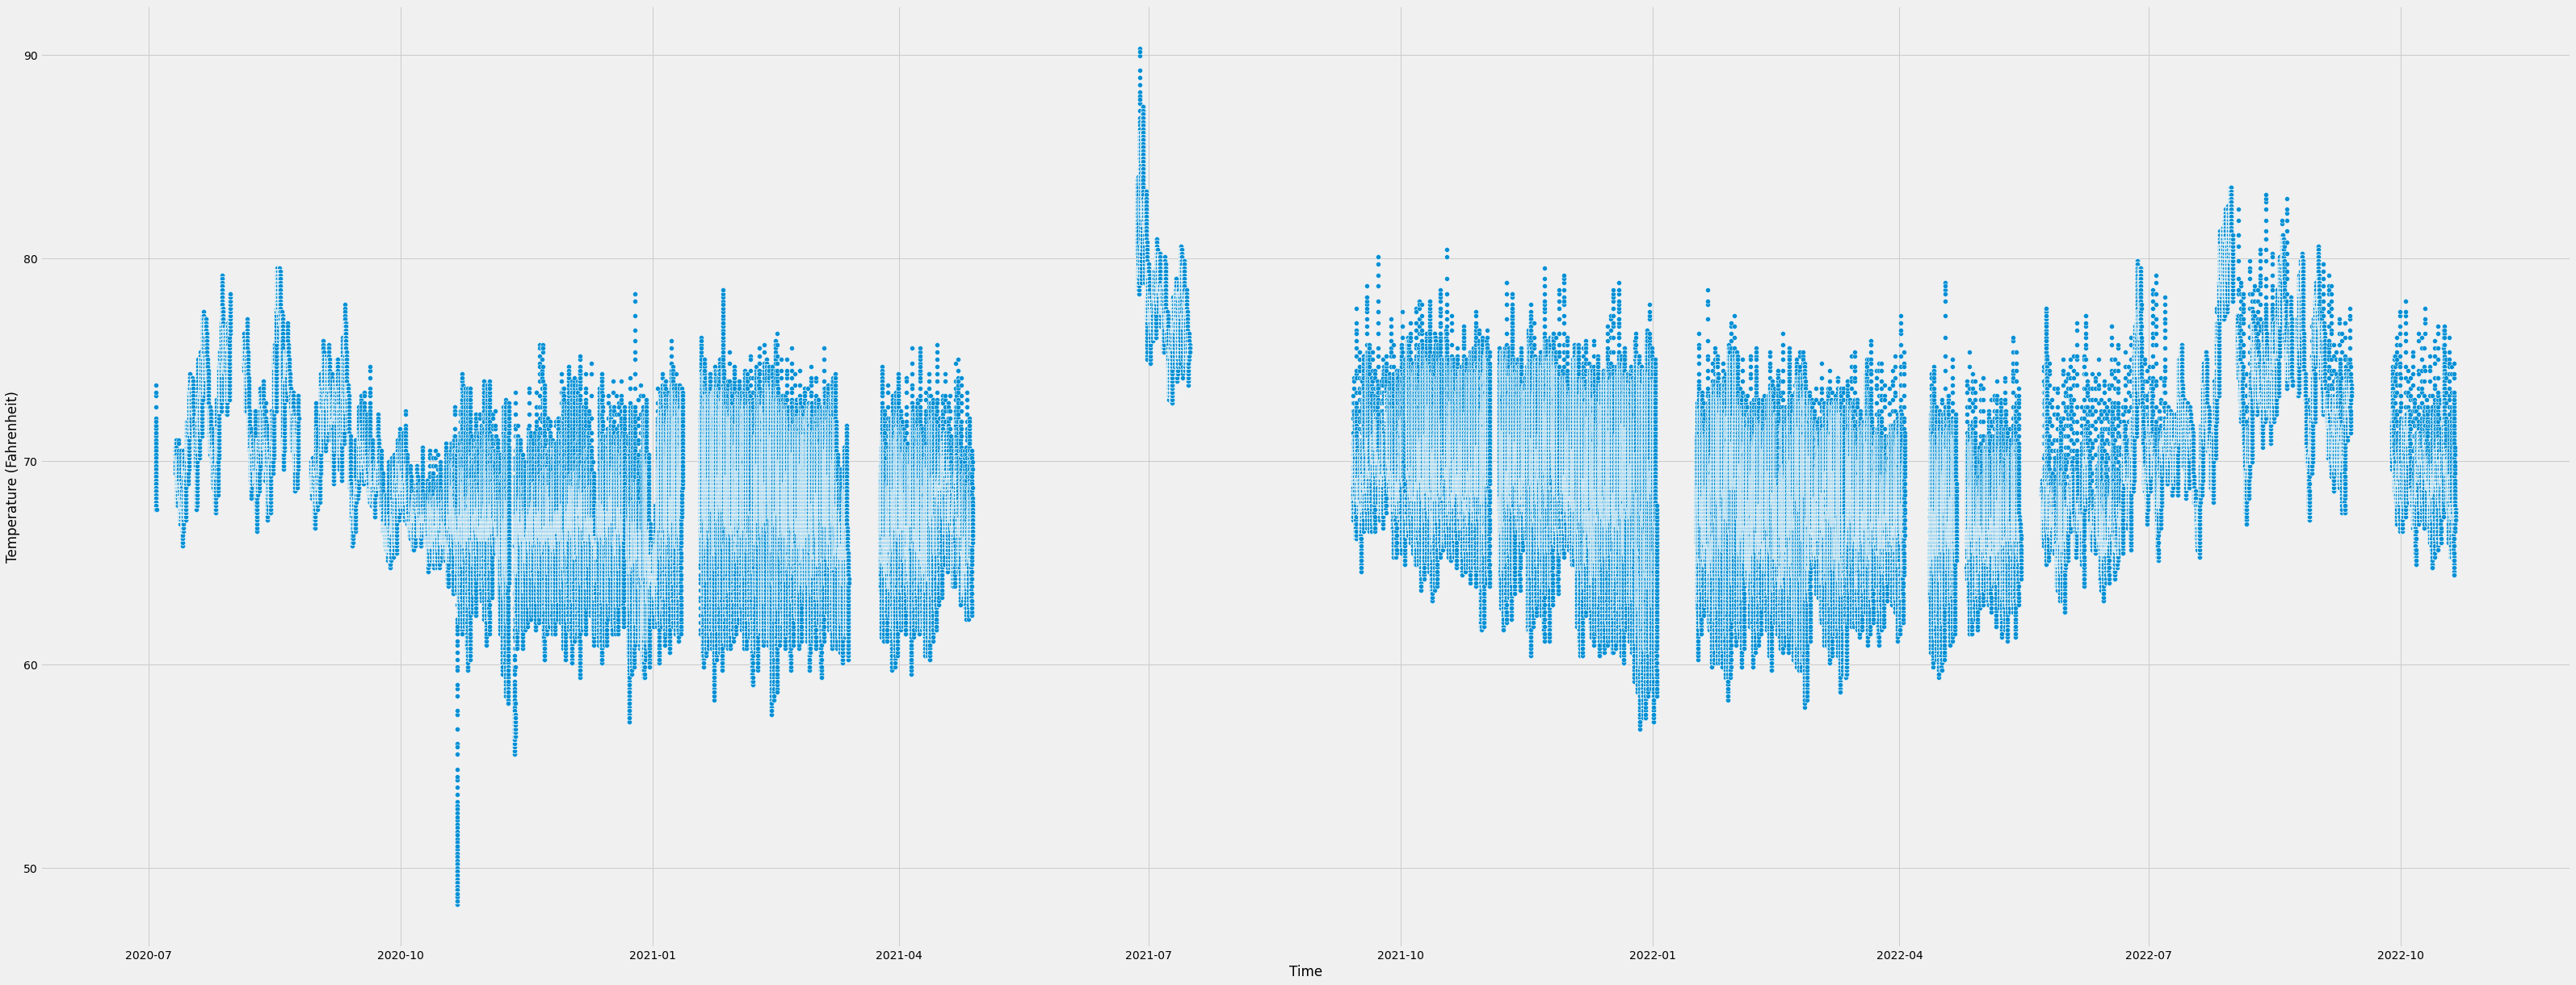

In [ ]:
import seaborn as sns
plt.figure (figsize=(50, 20))
sns.scatterplot(x=resultdf['Time'], y=resultdf['Temperature (Fahrenheit)'])
plt.show()

In [ ]:
#Median temperature for each day of the year
median =resultdf.groupby([resultdf['Time'].dt.dayofyear])["Temperature (Fahrenheit)"].median()
print (median)
print (resultdf.groupby([resultdf['Time'].dt.dayofyear])["Temperature (Fahrenheit)"].max())
print (resultdf.groupby([resultdf['Time'].dt.dayofyear])["Temperature (Fahrenheit)"].min())
#import seaborn as sns
#sns.scatterplot(x=range (1, 366), y=resultdf.groupby([resultdf['Time'].dt.dayofyear])["Temperature (Fahrenheit)"].median())
#plt.show()


Time
1.0      64.94
2.0      64.40
3.0      67.82
4.0      67.10
5.0      66.74
         ...  
362.0    65.30
363.0    63.86
364.0    65.48
365.0    65.48
366.0    64.76
Name: Temperature (Fahrenheit), Length: 355, dtype: float64
Time
1.0      75.02
2.0      73.58
3.0      73.40
4.0      74.30
5.0      73.94
         ...  
362.0    74.48
363.0    76.46
364.0    77.72
365.0    75.56
366.0    66.92
Name: Temperature (Fahrenheit), Length: 355, dtype: float64
Time
1.0      57.20
2.0      58.46
3.0      60.08
4.0      61.88
5.0      60.98
         ...  
362.0    57.38
363.0    57.38
364.0    58.46
365.0    58.82
366.0    62.42
Name: Temperature (Fahrenheit), Length: 355, dtype: float64


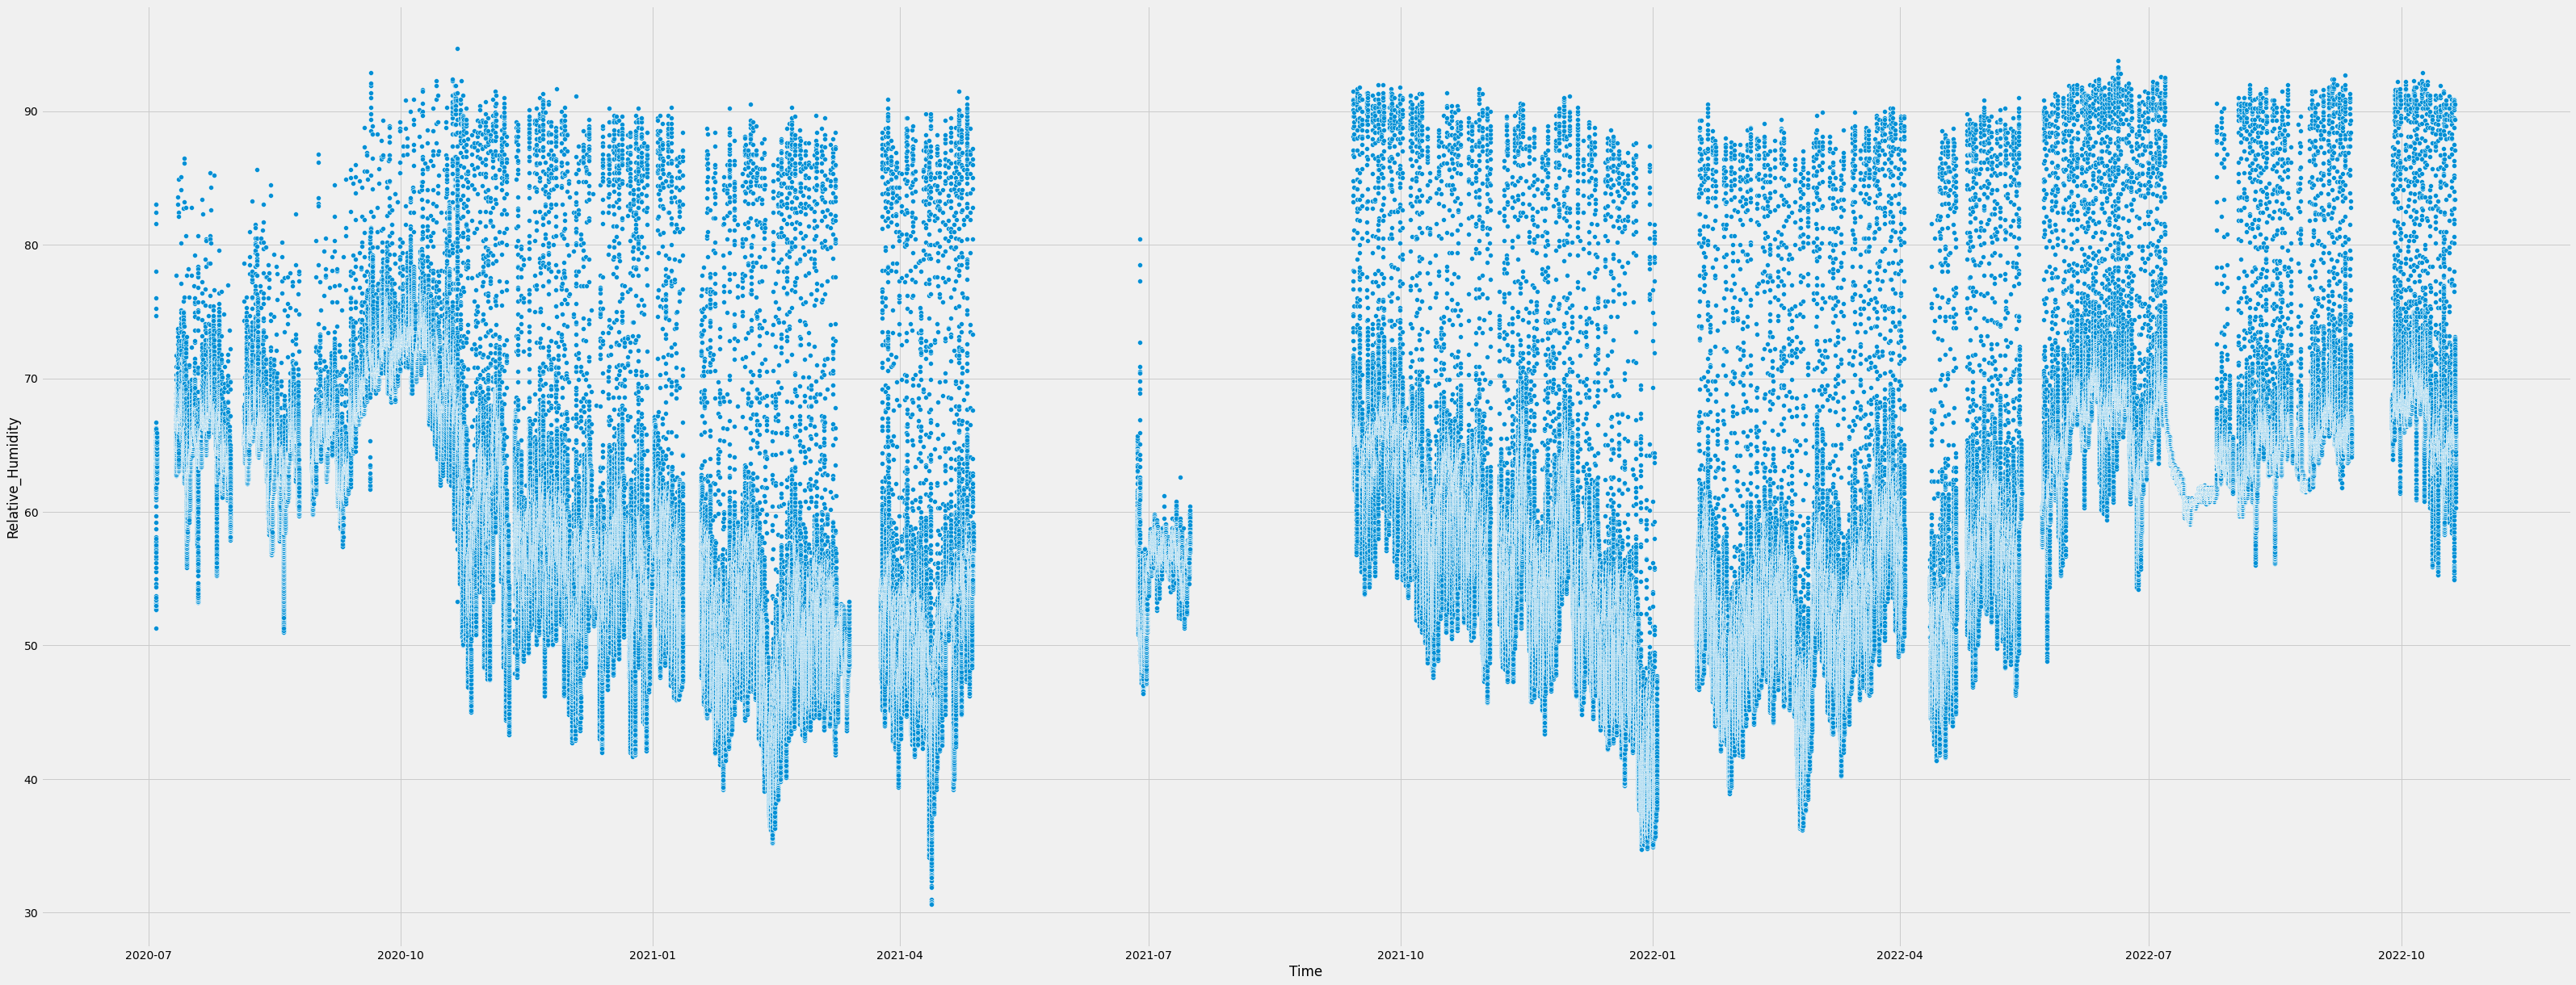

In [ ]:
plt.figure (figsize=(50, 20))
sns.scatterplot(x=resultdf['Time'], y=resultdf['Relative_Humidity'])
plt.show()

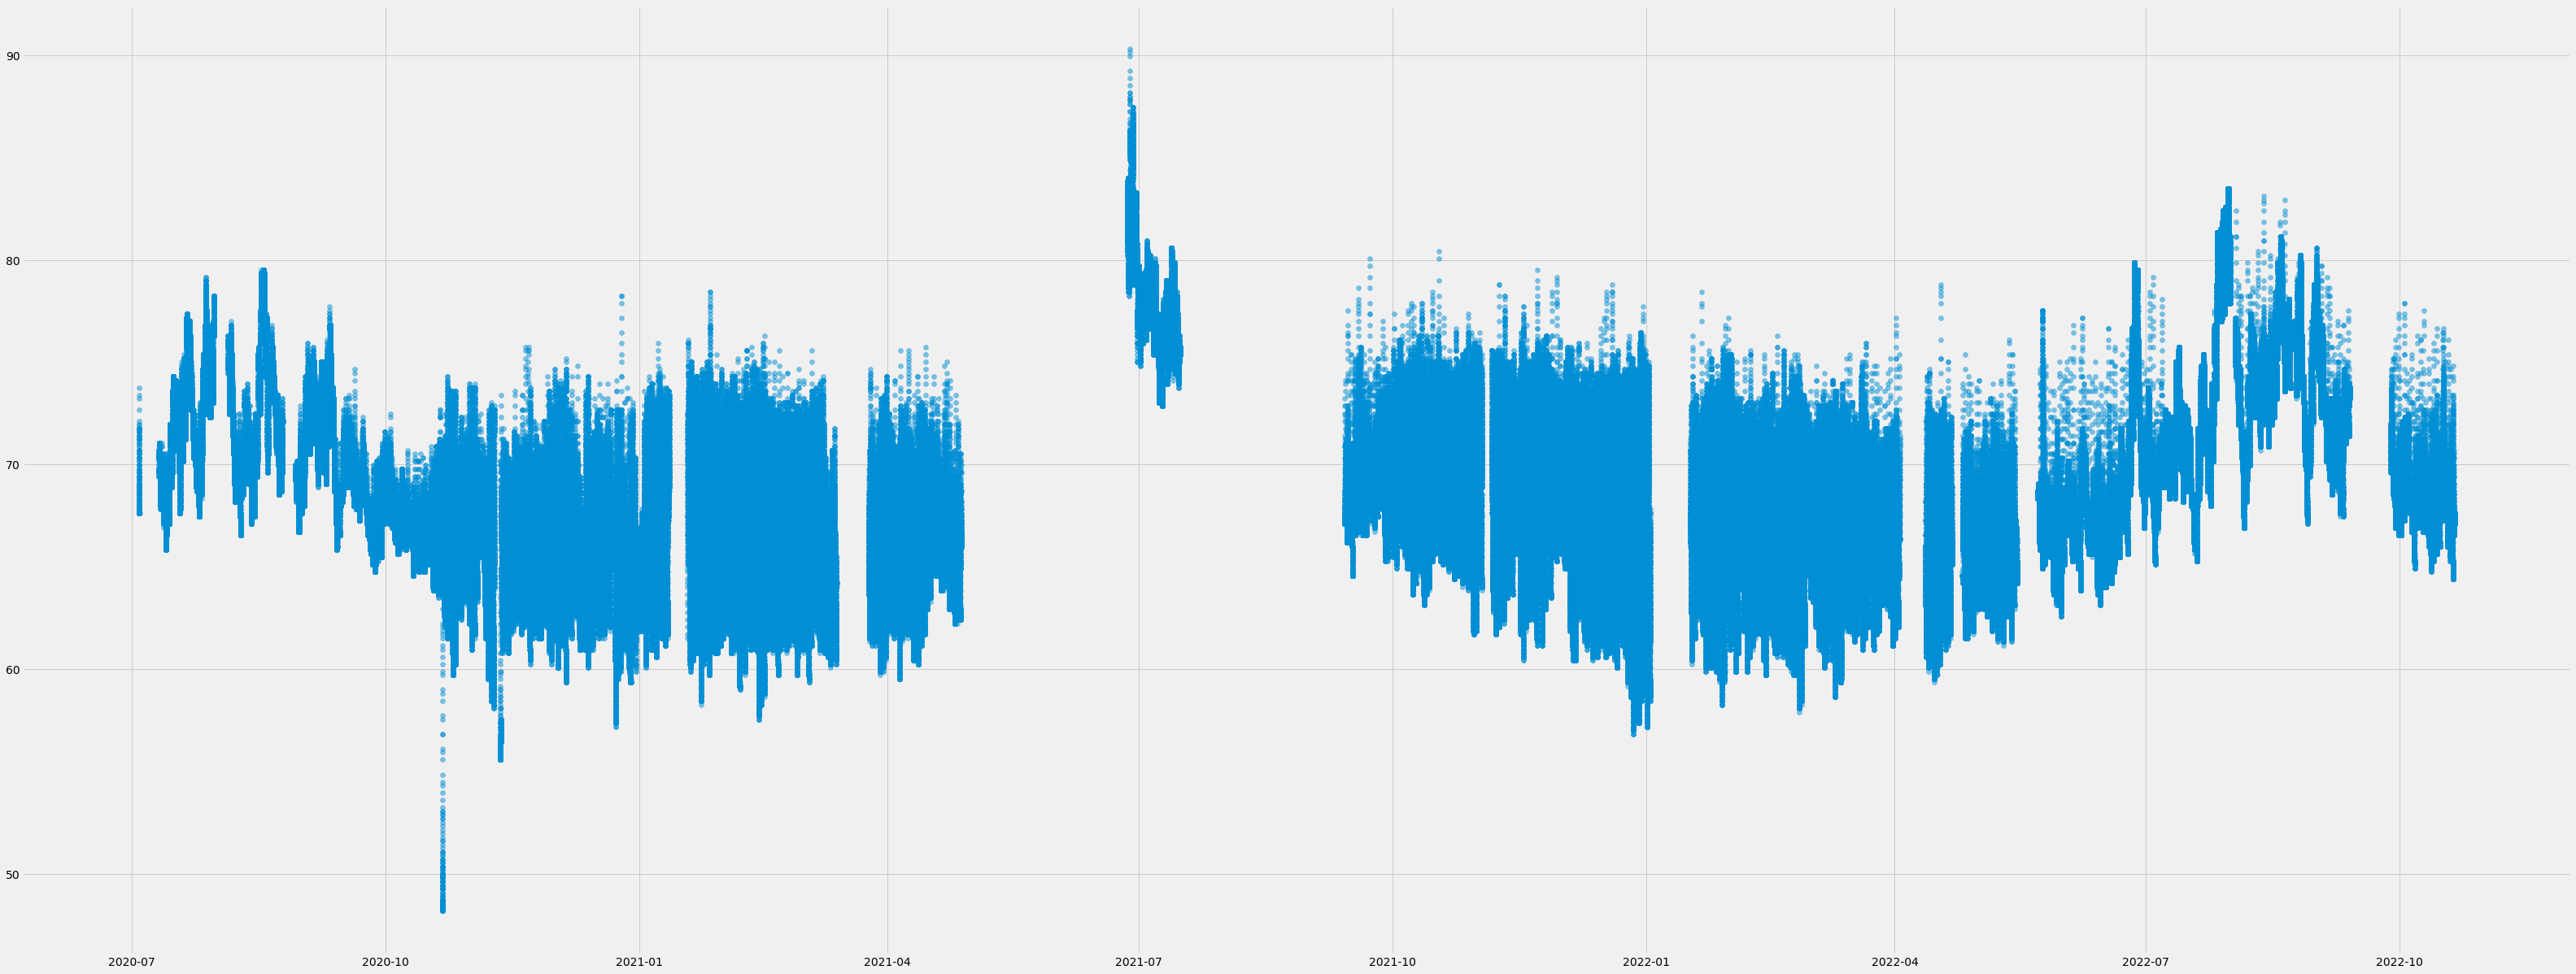

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

plt.figure (figsize=(50, 20))
plt.scatter(x=resultdf['Time'], y=resultdf['Temperature (Fahrenheit)'], alpha=0.5)
plt.show()